In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

from tf_utils import create_placeholders, random_mini_batches, initialize_parameters, forward_propagation, compute_cost, model

%matplotlib inline
np.random.seed(1)

In [2]:
# load data 
data = np.loadtxt(open("data/20170910/ai_challenger_stock_train_20170910/stock_train_data_20170910.csv", "rb"), delimiter=",", skiprows=1)

In [3]:
m = data.shape[0] # training examples 

# Shuffle data
permutation = list(np.random.permutation(m))
shuffled_data = data[permutation, :]

X = data[:, 1:89]
Y = data[:, 90]
Y = np.reshape(Y, (1, m))

weight = data[:, 89]
group = data[:, 91]
era = data[:, 91]


ndev = 10000
train_X = X.T[:, 0 : m-ndev]
train_Y = Y[:, 0:m-ndev]
dev_X = X.T[:, m-ndev:]
dev_Y = Y[:, m-ndev:]

print("Number of training examples: " + str(m - ndev))
print("Number of development examples: " + str(ndev))
print("train_X shape " + str(train_X.shape))
print("train_Y shape " + str(train_Y.shape))
print("dev_X shape " + str(dev_X.shape))
print("dev_Y shape " + str(dev_Y.shape))

Number of training examples: 311674
Number of development examples: 10000
train_X shape (88, 311674)
train_Y shape (1, 311674)
dev_X shape (88, 10000)
dev_Y shape (1, 10000)


In [4]:
# Create placeholders
X, Y = create_placeholders(88, 1)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X:0", shape=(88, ?), dtype=float32)
Y = Tensor("Y:0", shape=(1, ?), dtype=float32)


Cost after epoch 0: 0.669423
Cost after epoch 100: 0.607929


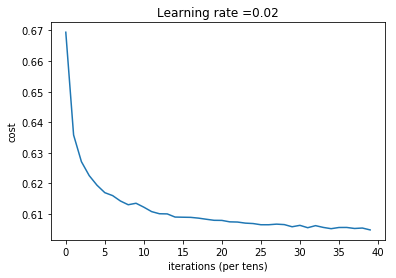

Parameters have been trained!
Train Accuracy: 0.666661
Test Accuracy: 0.5729
1


In [6]:
# Initialize parameters
print(1)parameters = model(train_X, train_Y, dev_X, dev_Y, 0.02, 200, 256)


In [8]:
W1 = parameters['W1']
b1 = parameters['b1']
W2 = parameters['W2']
b2 = parameters['b2']
W3 = parameters['W3']
b3 = parameters['b3']

print(W1.shape)

(25, 88)


In [120]:
def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [6]:
W1 = parameters['W1']
b1 = parameters['b1']
W2 = parameters['W2']
b2 = parameters['b2']
W3 = parameters['W3']
b3 = parameters['b3']

Z1 = np.dot(W1, test_X) + b1
A1 = relu(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = relu(Z2)
Z3 = np.dot(W3, A2) + b3
A3 = sigmoid(Z3)

NameError: name 'test_X' is not defined

In [161]:
data_id = test_data[:, 0]
print(A3.shape)
data_id = np.reshape(data_id, (1, A3.shape[1]))

res = np.concatenate((data_id, A3), axis=0)
print(res.shape)

print(res[:][0:100])

(1, 202757)
(2, 202757)
[[  3.21674000e+05   3.21675000e+05   3.21676000e+05 ...,   5.24428000e+05
    5.24429000e+05   5.24430000e+05]
 [  3.60744353e-01   5.78961171e-02   1.67434865e-02 ...,   3.68914916e-01
    8.13683815e-01   3.52504533e-01]]


In [162]:
df = pd.DataFrame(res.T)
df.to_csv('test.csv', columns=[0,1])

(1, 202757)
(202757, 88)
1


[]

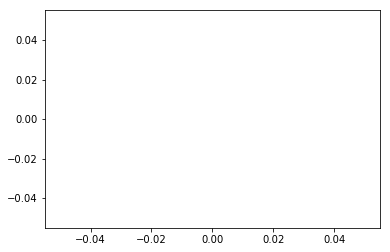

In [7]:
plt.plot()